In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
plt.style.use('Solarize_Light2')

In [68]:
# Read the data
covid = pd.read_csv("covid-data.csv")

In [69]:
# Convert 'date' column to datetime
data = pd.read_csv("covid-data.csv", usecols=["iso_code", "continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]).dropna()

# Read data and drop NA values
data['date'] = pd.to_datetime(data['date'])

In [70]:
# Group by location and sum new cases
top_5 = data.groupby('location')['new_cases'].sum().nlargest(5)

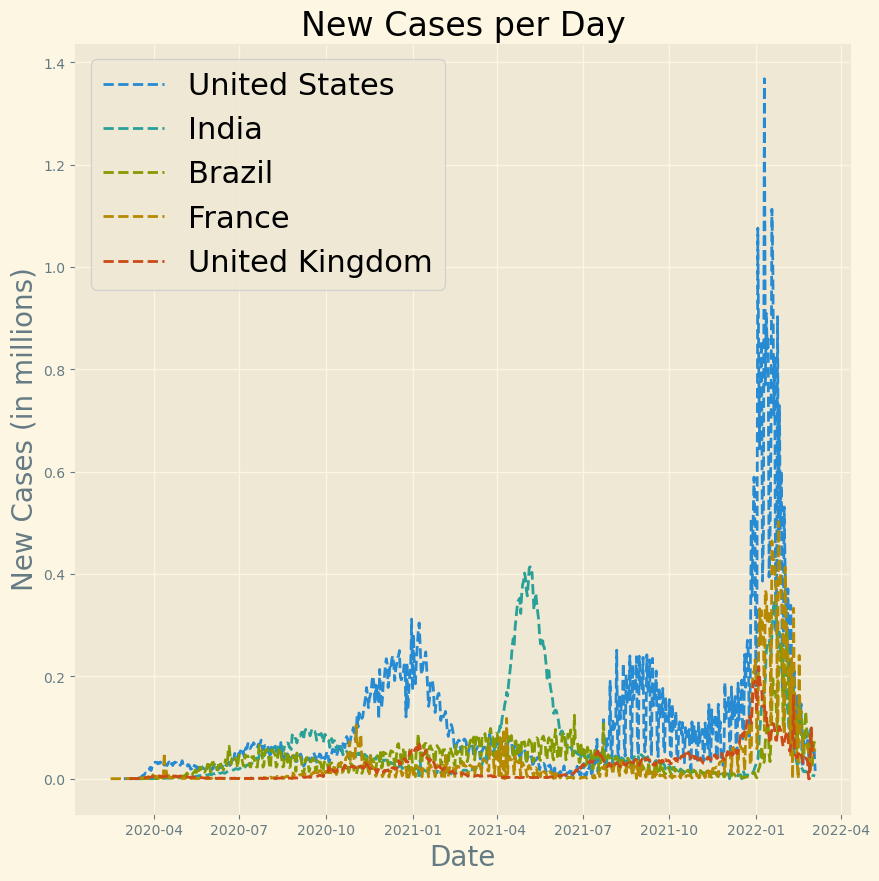

In [71]:
# Plot line chart
plt.figure(figsize=(10,10))
[plt.plot(data[data['location'] == country]['date'], data[data['location'] == country]['new_cases'] / 1e6, label=country, linestyle='dashed') for country in top_5.index]
plt.xlabel('Date', fontsize=20)
plt.ylabel('New Cases (in millions)', fontsize=20)
plt.title('New Cases per Day', fontsize=24)
plt.legend(loc='upper left', fontsize=22)
plt.savefig("new_cases_line_plot.png", dpi=200)
plt.show()

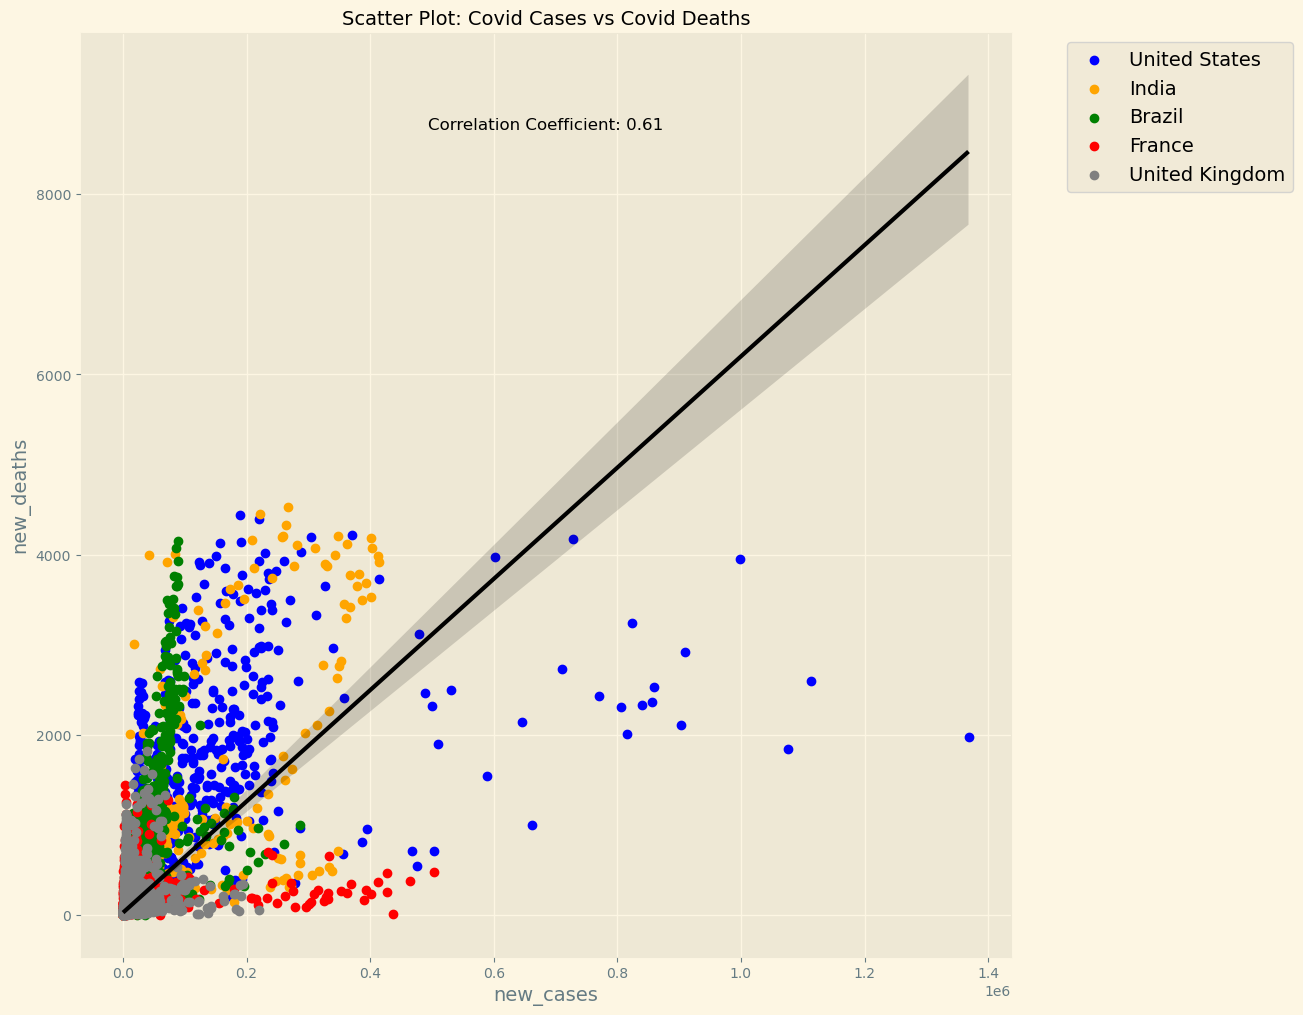

In [72]:
# Plot Scatter chart
plt.figure(figsize=(12, 12))
colors = ['blue', 'orange', 'green', 'red', 'gray']

for i, country in enumerate(top_5.index):
    country_data = data[data['location'] == country]
    plt.scatter(country_data['new_cases'], country_data['new_deaths'], label=country, color=colors[i])

plt.xlabel('Covid Cases', fontsize=14)
plt.ylabel('Covid Deaths', fontsize=14)
plt.title('Scatter Plot: Covid Cases vs Covid Deaths', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Statistical Analysis
correlation = data[['new_cases', 'new_deaths']].corr().iloc[0, 1]
plt.text(0.5, 0.9, f'Correlation Coefficient: {correlation:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Regression Line
sns.regplot(x=data['new_cases'], y=data['new_deaths'], scatter=False, color='black')

plt.grid(True)
plt.savefig("covid_cases_vs_covid_deaths.png", dpi=200, bbox_inches='tight')
plt.show()

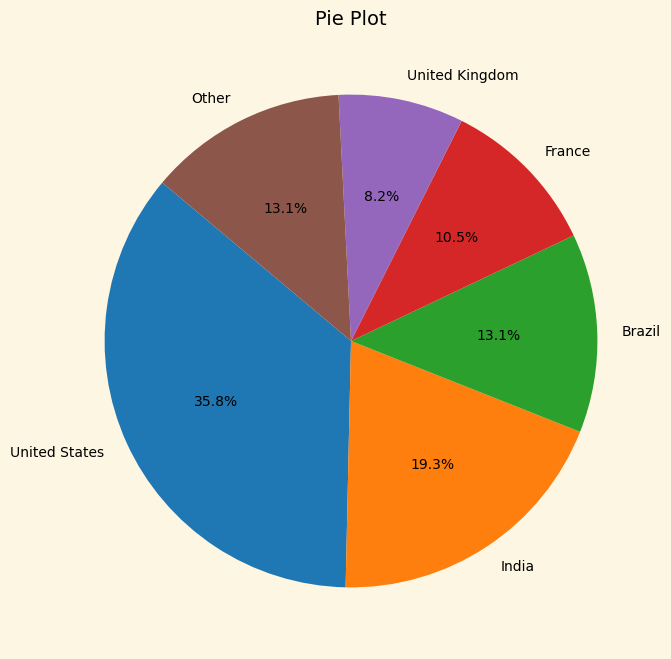

In [73]:
# Plot pie chart
plt.figure(figsize=(8,8))
plt.title('Pie Plot', fontsize=14)
labels = data.groupby('location')['new_cases'].sum().nlargest(5) / data['new_cases'].sum() * 200
labels['Other'] = 100 - labels.sum()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.pie(labels, labels=labels.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.savefig("pie_chart.png", dpi=300)
plt.show()

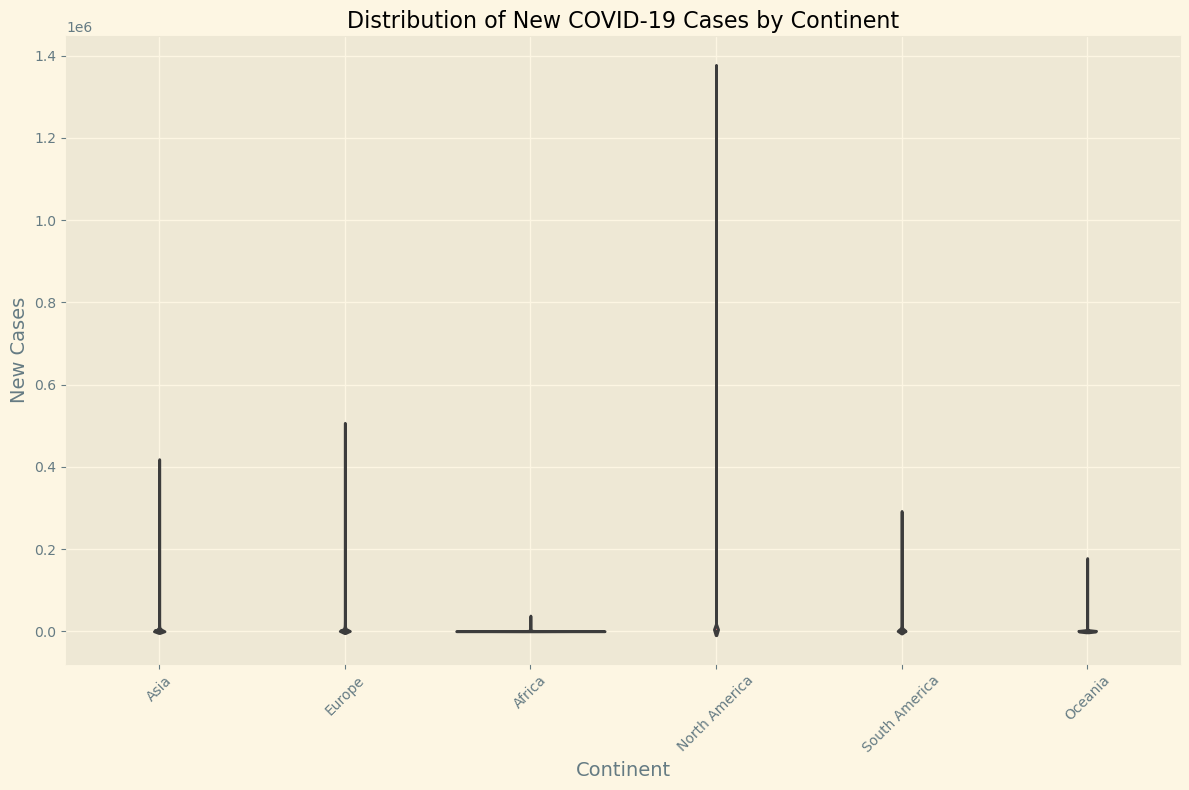

In [74]:
# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='continent', y='new_cases', data=data, palette='muted', inner='quartile')
plt.xlabel('Continent', fontsize=14)
plt.ylabel('New Cases', fontsize=14)
plt.title('Distribution of New COVID-19 Cases by Continent', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("violin.png", dpi=300)
plt.show()